![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Introdution to Machine Learning 
<blockquote>Discipline 5955006-2, USP-RP 06/05/2020 </blockquote>

### <img width="400" src="Usp_logo.png">

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Objectives:

<blockquote>
    <ol>
        <li>Making datasets reader function for:
    csv, xlsx and json data formats</li>
        <li>Confection of a decision Tree Class</li>
        <li>Plot the best visualization forms to see the results</li>
    </ol>
</blockquote>
    

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 1. Making datasets reader function for:
<blockquote>
csv, xlsx and json data formats
</blockquote>

In [1]:
import pandas as pd # import library for read datasets types

# this function read a datset with format of: csv, json or xlsx
#
# path: the path of dataset in your computer
#
# extension: string of the format extension of dataset
#
# Return: this function returns a pandas DataFrame of your dataset 
def Read_Data(path, extension = None):
    
    aceptable_formats = ['csv', 'xlsx', 'json']
    
    if (extension not in aceptable_formats):
        print('please choose a aceptable format: ', aceptable_formats)
        return
    
    if(extension == 'xlsx'):
        return pd.read_excel(path)
    
    if(extension == 'csv'):
        return pd.read_csv(path)
    
    if(extension == 'json'):
        return pd.read_json(path)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 2. Making the Decision Tree Class:
## This class has:
<blockquote>
    <ol>
        <li> Init </li>
        <li> Train </li>
        <li> Post prunning </li>
        <li> Visualize </li>
    </ol>
</blockquote>

In [7]:
import numpy as np
import math
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

class DecisionTree():
    
    # @__init__ Constructor method of our Decision Tree class 
    # 
    # iteration: iteration of recursive method
    # worn to know if is the first time of Train() was called
    #
    # vector_class: List which has [Atribute, Atribute_value, iteration] or [Atribute, Atribute_value, level of node, class] (if the node is a leaf)
    # worn to predict a new sample and for visualize the deciosion boundaries
    #
    def __init__(self):
        self.iteration = 0
        self.vector_class = []
    
    # Train method of our Decision Tree class, receive the all data of type 'pd.DataFrame' and is responsable for train the Decision Tree 
    # 
    def Train(self, data):
        number_types = ['int64', 'float64'] # just to verify if the data is numerical or not
            
        # in the first iteration just copy the data, slice the classes and tranform the classes to 0, 1, ... , N. N is the number of Classes.
        if (self.iteration == 0):
            Data = data.copy() # copy the data
            self.True_data = Data.iloc[:, :-1] # slice the class of the atributes
            data = self.True_data # data is our data to manipulate
            self.Classes = pd.Series(Data.iloc[:, -1]) # taking the classes of data
            self.label_classes = np.unique(self.Classes) # seeying the unique values of our Classes
            
            # transform the label of  classes in 0,1, ... , N.
            for i in range(len(self.label_classes)):
                self.Classes[self.Classes == self.label_classes[i]] = i
                
        atributos = data.shape[1] # number of atributes
        N = data.shape[0] # number of samples
        
        ganho_info_atributos = [] # list which has all the information gain of each atribute in a one iteration 
        
        # for each atribute in our date
        for atributo in range(atributos):

            ordened_unique_values = np.unique([data.iloc[:,atributo]]) # separe the uniques values of current atribute
            tabela_atual = np.zeros(shape=(ordened_unique_values.shape[0], self.label_classes.shape[0])) # create the table of a decision tree
            tabela_atual = pd.DataFrame(tabela_atual, columns=[self.label_classes], index=[ordened_unique_values]) # just transform to a dataframe for more easy manipulation
            
            ganho_info_atributo = 0 # current atribute information gain
            
            # if the atribute is not a numeric
            if(data.dtypes[atributo] not in number_types):
            
                # for each unique value on atribute
                for ind,unique_valor in enumerate(ordened_unique_values):                    
                    
                    # for each sample
                    for row in range(N):
                        
                        # calculate the frequency table
                        if(data.iloc[row,atributo] == unique_valor):
                            tabela_atual.iloc[ind, self.Classes[data.index[row]]] = tabela_atual.iloc[ind, self.Classes[data.index[row]]] + 1 
                    
                ############# calculate the information gain of this atribute ############
                
                for i in range(len(tabela_atual.index)):
                    
                    # calcule  a soma dos mesmos
                    total_unique = tabela_atual.iloc[i, :].sum()
                    
                    ganho_info = 0 # information gain in a subdomain T
                    
                    # for each class
                    for j in range(len(tabela_atual.columns)):

                        # if the frequency of this class is zero, just pass
                        if(tabela_atual.iloc[i,j] == 0.0):
                            ganho_info = ganho_info
                        # else sum the information gain in this subdomain 
                        else:
                            ganho_info = ganho_info + tabela_atual.iloc[i,j]/total_unique * math.log2(tabela_atual.iloc[i,j]/total_unique)

                    # the total information gain of atribute
                    ganho_info_atributo = ganho_info_atributo + abs((total_unique/ N) * (ganho_info))

                ganho_info_atributos.append([ganho_info_atributo, atributo]) # just append in List of information gain atributes
            
            else:  
                print('Não trabalhamos com valores não categóricos!')
                return
                
        melhor_atri =  sorted(ganho_info_atributos, key=itemgetter(0)) # choose the best atribute, i. e., which one with the more information gain 

        ##### verify if this domain will be a node or a leaf ######
        # for each unique value of the chosen atribute
        for unique in np.unique(data.loc[:, (data.columns[melhor_atri[0][1]])]):
            
            # slice the dataset for each unique vlaue
            new_data = data.loc[data.loc[:,(data.columns[melhor_atri[0][1]])] == unique]
            
            # if the new domain has only sample of same class or has 2 or minus samples, this domain will be a leaf. 
            if(len(set(self.Classes[new_data.index])) == 1 or new_data.size <= 2):
                # just cool print of a tree
                print('{} {} = {}: {}'.format((len(self.True_data.columns) -  len(data.columns)) * '  ' + ':...',new_data.columns[melhor_atri[0][1]], unique, self.label_classes[self.Classes[new_data.index[0]]]))
                
                # append on a list of vector_classes
                self.vector_class.append([new_data.columns[melhor_atri[0][1]], unique, len(self.True_data.columns) -  len(data.columns), self.label_classes[self.Classes[new_data.index[0]]]])
                # and just pass 
                pass

            # else, remove of data the chosen atribute and call again Train() method    
            else:
                
                # just cool print of a tree
                print('{} {} = {}: '.format((len(self.True_data.columns) - len(data.columns)) * '  ' + ':...',new_data.columns[melhor_atri[0][1]], unique))
                
                # append on a list of vector_classes
                self.vector_class.append([new_data.columns[melhor_atri[0][1]], unique, len(self.True_data.columns) -  len(data.columns)])
                
                # remove the chosen atribute
                new_data = new_data.drop(columns=data.columns[melhor_atri[0][1]])
                self.iteration = self.iteration + 1 # count the iteration
                
                # call again the Train() method
                self.Train(new_data)
    
    # predict method of our Decision Tree class, receive the sample of type pandas Dataframe, return the class of a current trained decision tree.
    # 
    def predict(self, dado):
        anterior = [] # a list for know who's atributes was already seen
        
        # for each node in our decision tree 
        for vector in self.vector_class:
            
            # if the node is a node.
            if len(vector) == 3:
                
                # if the sample has the same value for this atribute and the atribute was not already seen and the total of atributes seen is the same of the current level in a tree.
                if (dado[vector[0]] == vector[1] and vector[0] not in anterior and len(anterior) == vector[2]):
                    
                    # just append the node
                    anterior.append(vector[0])
                    
            # if is a leaf.
            if len(vector) == 4:
                
                # if the sample has the same value for this atribute and the total of atributes seen is the same of the current level in a tree.
                # we found the class of our tree.
                if (dado[vector[0]] == vector[1] and len(anterior) == (vector[2])):
                    print('A classe é {}'.format(vector[3]))
                    return vector[3]
                
    # predict method of our Decision Tree class,
    # return the decision boundaries of our tree.
    # 
    def visualize_region(self):
        
        atributos = [] # list of all atributes already seen
        ax = plt.gca() # image to plot
        
        colors = [k for k,v in pltc.BASE_COLORS.items()] # just a list of colors to display the classes
        classes = list(self.label_classes) # all the labels of classes in data      
        
        # for each class
        for i,vector in enumerate(DT.vector_class):
            
            # if the atribute was not already seen
            if (vector[0] not in atributos):
                atributos.append(vector[0]) # append in atributes already seen
                
                # plot a point of this atribute in Y axis
                plt.plot(vector[0])
                
                # plot a scatter plot in x,y (the unique value associate at this atribute ,same atribute)
                plt.scatter([vector[1]],[atributos.index(vector[0])], c='black')
                
                # plot the label of this unioque value of atribute
                plt.text(vector[1],atributos.index(vector[0]), vector[1])
                
                # if is a leaf
                if (len(vector) == 4):
                    # plot the current point in other color
                    plt.scatter([vector[1]],[atributos.index(vector[0])], c=colors[classes.index(vector[3])])
            else:
                
                # plot a scatter plot in x,y (the unique value associate at this atribute ,same atribute)
                plt.scatter([vector[1]],[atributos.index(vector[0])], c='black')
                
                # plot the label of this unioque value of atribute
                plt.text(vector[1],atributos.index(vector[0]), vector[1])
                
                # if is a leaf
                if (len(vector) == 4):
                    # plot the current point in other color
                    plt.scatter([vector[1]],[atributos.index(vector[0])], c=colors[classes.index(vector[3])])

        
        plt.legend(self.label_classes) # add the legend of our image
        leg = ax.get_legend()
        
        # just setting the rigth color for each class
        for i in range(len(self.label_classes)):
            
            leg.legendHandles[i].set_color(colors[i])

        ax.set_xlim([0,len(self.vector_class)])
        plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 3. Testing the Decision Tree Class:

:... Aparência  = chuva : 
  :... Ventando  = falso : sim
  :... Ventando  = verdadeiro : não
:... Aparência  = nublado : sim
:... Aparência  = sol : 
  :... Umidade  = alta : não
  :... Umidade  = normal : sim


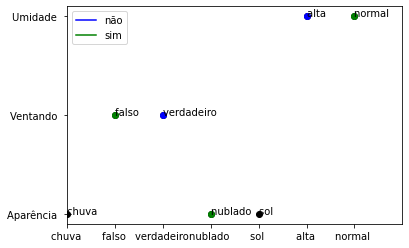

Aparência              sol 
Temperatura         quente 
Umidade              normal
Ventando        verdadeiro 
Jogar                   não
Name: 2, dtype: object


In [35]:
data = Read_Data('servo_data.csv', 'csv') # read a lecture example 
DT = DecisionTree() # instanciate a Decision Tree class
DT.Train(data = data) # Train the Tree
DT.visualize_region() # visualize
DT.predict(data.iloc[13,]) # example of predict the class of a new sample 